**CS109A Final Project**<br/>
**Group 12**<br/>
**EDA Page**<br/>

Import libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns; sns.set(color_codes=True)
sns.set(style="whitegrid")


In [58]:
# Load in data
df = pd.read_csv('total_info.csv', encoding = 'latin-1')

In [59]:
# Clean Variables
del df['Unnamed: 0']
df['artist_popularity'] = pd.to_numeric(df['artist_popularity'], errors = 'coerce')
df['artist_followers'] = pd.to_numeric(df['artist_followers'], errors = 'coerce')

In [60]:
# Create pop indicator variable array
pop_ind = []
rap_ind = []
rock_ind = []
for idx, row in enumerate(df['artist_genres'].values):
    if 'pop' in row:
        pop_ind.append(1)
    else:
        pop_ind.append(0)
        
    if 'rap' in row or 'hip' in row:
        rap_ind.append(1)
    else:
        rap_ind.append(0)
        
    if 'rock' in row:
        rock_ind.append(1)
    else:
        rock_ind.append(0)
        
# Append array to dataframe
df['pop_ind'] = pop_ind
df['rap_ind'] = rap_ind
df['rock_ind'] = rock_ind

In [61]:
# Artist Popularity 75% is a 75, use for indicator 
df['artist_popularity'].describe()
df['popular_artist_ind'] = (df['artist_popularity'] >= 75)*1
df.head()

,playlist_id,playlist_name,followers,song_name,number_of_artists,artist_name,artist_id,popularity,track_number,explicit,duration_ms,available_markets,delete,artist_popularity,artist_followers,artist_genres,pop_ind,rap_ind,rock_ind,popular_artist_ind
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,18123888.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,197993,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1
1,37i9dQZF1DWXDAhqlN7e6W,This Is: Max Martin,15685.0,Hands To Myself,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,69,3,0,200680,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1
2,37i9dQZF1DX7Q7o98uPeg1,Funkst,397098.0,Good For You - KASBO Remix,3,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,35,3,0,221560,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1
3,37i9dQZF1DX3LyU0mhfqgP,Out Now,439685.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,197993,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1
4,37i9dQZF1DX35oM5SPECmN,HIIT Workout,712771.0,Come & Get It,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,56,1,0,231733,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1


In [7]:
# Sum Up the 100 tracks of info (or less) for each playlist
unique_plists = df['playlist_id'].unique()
columns = ['playlist','name','followers','num_songs','av_song_pop','pct_explicit','avg_dur','av_artist_followers', 'pop_pct', 'rap_pct', 'rock_pct', 'popular_artist_pct']
eda_frame = pd.DataFrame(index=range(0,len(unique_plists)), columns=columns)
for idx,plist in enumerate(unique_plists):
    eda_frame.loc[idx]['playlist'] = plist
    eda_frame.loc[idx]['name'] = df.loc[df['playlist_id'] == plist]['playlist_name']
    eda_frame.loc[idx]['followers'] = np.mean(df.loc[df['playlist_id'] == plist]['followers'])
    eda_frame.loc[idx]['num_songs'] = len(df.loc[df['playlist_id'] == plist])
    eda_frame.loc[idx]['av_song_pop'] = np.mean(df.loc[df['playlist_id'] == plist]['popularity'])
    eda_frame.loc[idx]['pct_explicit'] = np.mean(df.loc[df['playlist_id'] == plist]['explicit'])
    eda_frame.loc[idx]['avg_dur'] = np.mean(df.loc[df['playlist_id'] == plist]['duration_ms'])
    eda_frame.loc[idx]['av_artist_followers'] = np.mean(df.loc[df['playlist_id'] == plist]['artist_followers'])
    eda_frame.loc[idx]['pop_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['pop_ind'])
    eda_frame.loc[idx]['rap_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['rap_ind'])
    eda_frame.loc[idx]['rock_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['rock_ind'])
    eda_frame.loc[idx]['popular_artist_pct'] = np.mean(df.loc[df['playlist_id'] == plist]['popular_artist_ind'])

In [8]:
eda_frame.head()

,playlist,name,followers,num_songs,av_song_pop,pct_explicit,avg_dur,av_artist_followers,pop_pct,rap_pct,rock_pct,popular_artist_pct
0,37i9dQZF1DXcBWIGoYBM5M,0 Today's Top Hits 47 Today's Top H...,1.81239e+07,50,82.38,0.34,208121,2.75535e+06,0.8,0.36,0,1
1,37i9dQZF1DWXDAhqlN7e6W,1 This Is: Max Martin 125 This Is:...,15685,44,55.5227,0.113636,220925,3.99045e+06,0.977273,0.272727,0.227273,0.75
2,37i9dQZF1DX7Q7o98uPeg1,2 Funkst 2500 Funkst 2569 Funks...,397098,100,32.87,0.09,241358,319005,0.12,0.5,0.03,0.08
3,37i9dQZF1DX3LyU0mhfqgP,3 Out Now 48 Out Now 267 Out...,439685,55,71.7273,0.181818,207392,1.02241e+06,0.654545,0.0727273,0.0181818,0.6
4,37i9dQZF1DX35oM5SPECmN,4 HIIT Workout 129 HIIT Workout 48...,712771,50,59.06,0.12,223608,3.32207e+06,0.9,0.24,0.34,0.62


In [9]:
df1 = eda_frame.drop(['playlist', 'name'], axis = 1)

In [10]:
sum(df1['rap_pct'])

219.25442230916607

In [11]:
for i,val in enumerate(df1['followers'].values):
    if df1['followers'][i] != 0:
        df1['followers'][i] = np.log(df1['followers'][i])
    else:
        pass

In [12]:
df1.head()

,followers,num_songs,av_song_pop,pct_explicit,avg_dur,av_artist_followers,pop_pct,rap_pct,rock_pct,popular_artist_pct
0,16.7127,50,82.38,0.34,208121,2.75535e+06,0.8,0.36,0,1
1,9.66046,44,55.5227,0.113636,220925,3.99045e+06,0.977273,0.272727,0.227273,0.75
2,12.8919,100,32.87,0.09,241358,319005,0.12,0.5,0.03,0.08
3,12.9938,55,71.7273,0.181818,207392,1.02241e+06,0.654545,0.0727273,0.0181818,0.6
4,13.4769,50,59.06,0.12,223608,3.32207e+06,0.9,0.24,0.34,0.62


In [13]:
df1['followers'] = pd.to_numeric(df1['followers'], errors='coerce').fillna(0)
df1['num_songs'] = pd.to_numeric(df1['num_songs'], errors='coerce').fillna(0)
df1['av_song_pop'] = pd.to_numeric(df1['av_song_pop'], errors='coerce').fillna(0)
df1['pct_explicit'] = pd.to_numeric(df1['pct_explicit'], errors='coerce').fillna(0)
df1['avg_dur'] = pd.to_numeric(df1['avg_dur'], errors='coerce').fillna(0)
df1['av_artist_followers'] = pd.to_numeric(df1['av_artist_followers'], errors='coerce').fillna(0)
df1['pop_pct'] = pd.to_numeric(df1['pop_pct'], errors='coerce').fillna(0)
df1['rap_pct'] = pd.to_numeric(df1['rap_pct'], errors='coerce').fillna(0)
df1['rock_pct'] = pd.to_numeric(df1['rock_pct'], errors='coerce').fillna(0)
df1['popular_artist_pct'] = pd.to_numeric(df1['popular_artist_pct'], errors='coerce').fillna(0)
df1.dtypes

followers              float64
num_songs                int64
av_song_pop            float64
pct_explicit           float64
avg_dur                float64
av_artist_followers    float64
pop_pct                float64
rap_pct                float64
rock_pct               float64
popular_artist_pct     float64
dtype: object

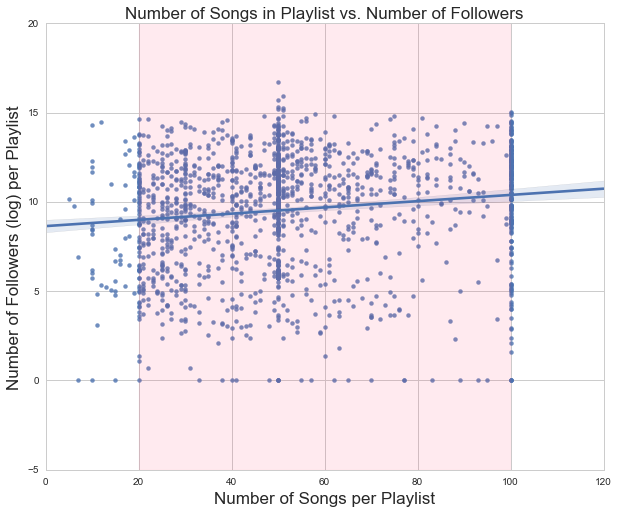

In [14]:
array_vals = df1['num_songs'].values
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(df1['num_songs'], df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('Number of Songs in Playlist vs. Number of Followers', size = 17)
plt.xlabel('Number of Songs per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

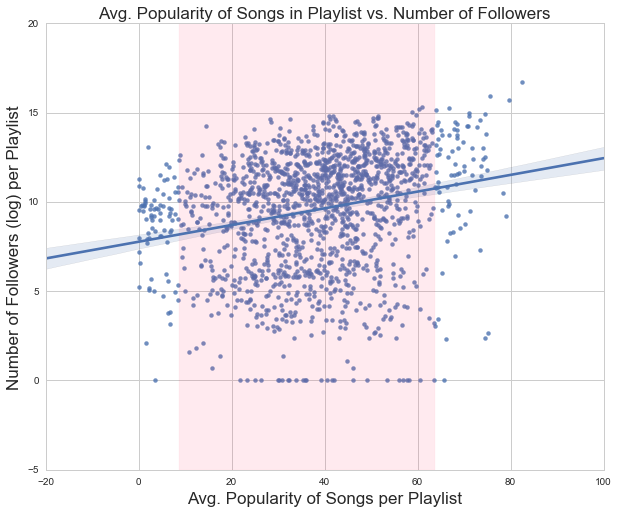

In [15]:
array_vals = df1['av_song_pop'].values
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(df1['av_song_pop'], df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('Avg. Popularity of Songs in Playlist vs. Number of Followers', size = 17)
plt.xlabel('Avg. Popularity of Songs per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

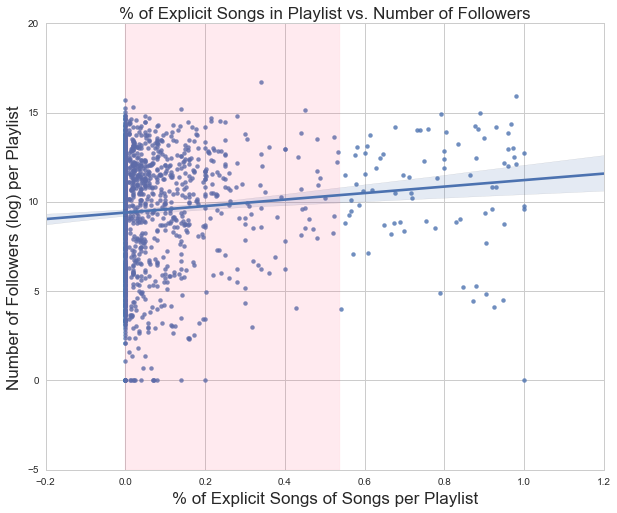

In [16]:
array_vals = df1['pct_explicit'].values
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(df1['pct_explicit'], df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('% of Explicit Songs in Playlist vs. Number of Followers', size = 17)
plt.xlabel('% of Explicit Songs of Songs per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

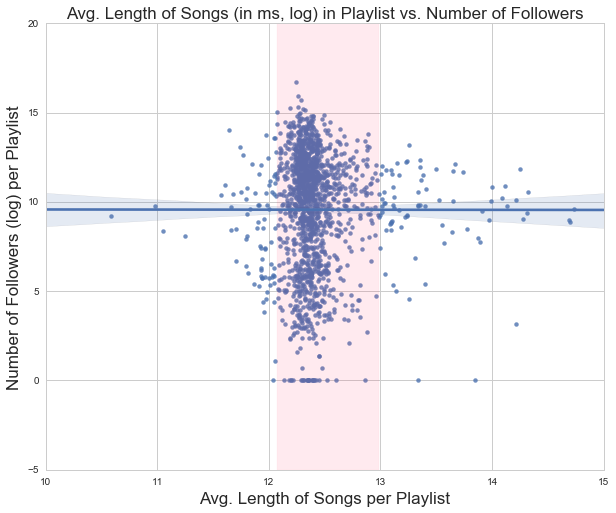

In [31]:
array_vals = np.log(df1['avg_dur'].values)
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(np.log(df1['avg_dur']), df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('Avg. Length of Songs (in ms, log) in Playlist vs. Number of Followers', size = 17)
plt.xlabel('Avg. Length of Songs per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

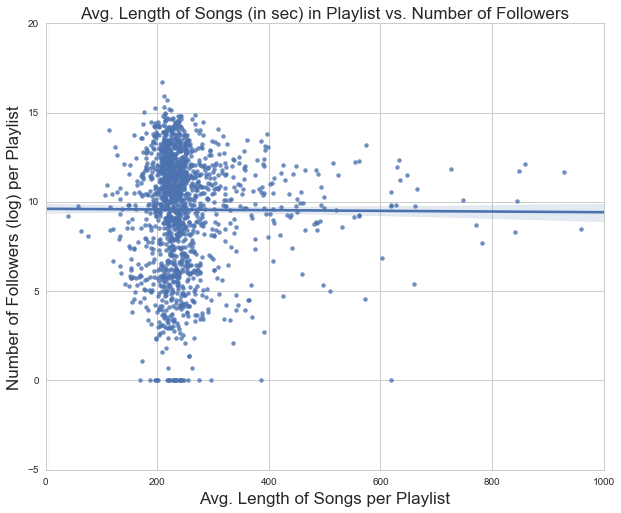

In [33]:
# Alt. version of graph above (CLOSER LOOK)
array_vals = np.log(df1['avg_dur'].values/1000)
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(df1['avg_dur']/1000, df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('Avg. Length of Songs (in sec) in Playlist vs. Number of Followers', size = 17)
plt.xlim(0,1000)
plt.xlabel('Avg. Length of Songs per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

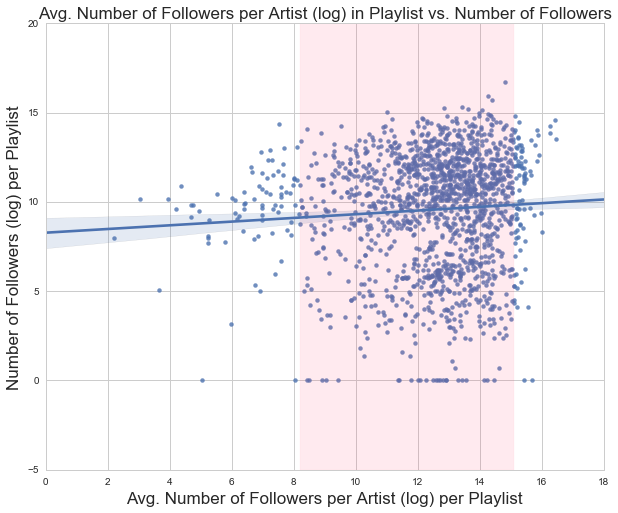

In [19]:
array_vals = np.log(df1['av_artist_followers'].values)
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(np.log(df1['av_artist_followers']), df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('Avg. Number of Followers per Artist (log) in Playlist vs. Number of Followers', size = 17)
plt.xlabel('Avg. Number of Followers per Artist (log) per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

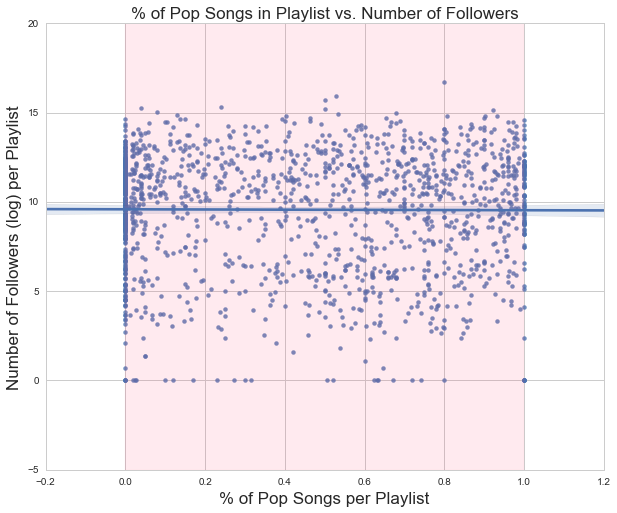

In [20]:
array_vals = df1['pop_pct'].values
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(df1['pop_pct'], df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('% of Pop Songs in Playlist vs. Number of Followers', size = 17)
plt.xlabel('% of Pop Songs per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

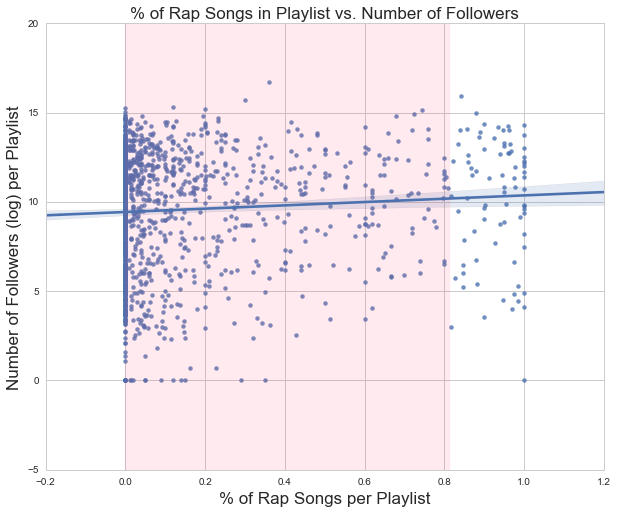

In [21]:
array_vals = df1['rap_pct'].values
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(df1['rap_pct'], df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('% of Rap Songs in Playlist vs. Number of Followers', size = 17)
plt.xlabel('% of Rap Songs per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

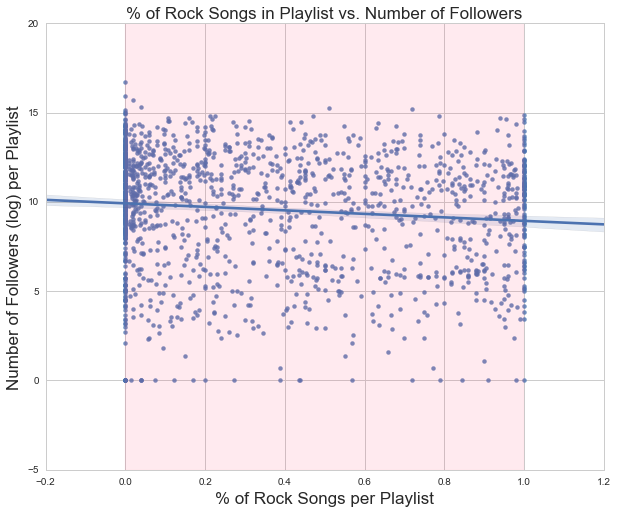

In [22]:
array_vals = df1['rock_pct'].values
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(df1['rock_pct'], df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('% of Rock Songs in Playlist vs. Number of Followers', size = 17)
plt.xlabel('% of Rock Songs per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

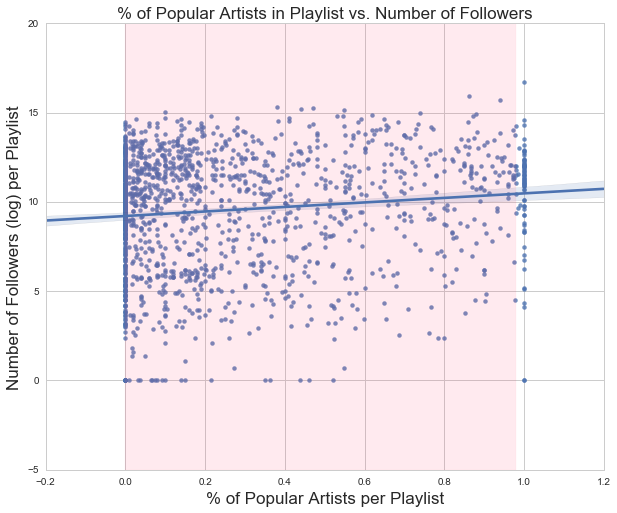

In [23]:
array_vals = df1['popular_artist_pct'].values
lower = np.percentile(array_vals, 5)
upper = np.percentile(array_vals, 95)
plt.figure(figsize = (10,8))
sns.regplot(df1['popular_artist_pct'], df1['followers'])
plt.axvspan(lower, upper, color = (1,.2,.4,0.1))
plt.title('% of Popular Artists in Playlist vs. Number of Followers', size = 17)
plt.xlabel('% of Popular Artists per Playlist', size = 17)
plt.ylabel('Number of Followers (log) per Playlist', size = 17)
plt.show()

In [24]:
df_train = df1.drop('followers', axis = 1)

In [25]:
train_corr_matrix = pd.DataFrame(np.corrcoef(df_train.T))
train_corr_matrix.columns = df_train.columns

In [26]:
train_corr_matrix.index = df_train.columns

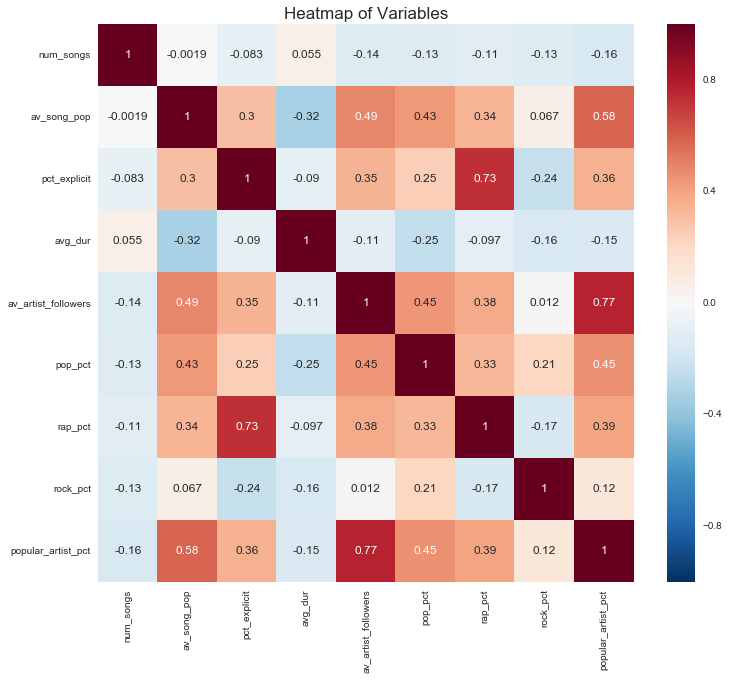

In [27]:
plt.figure(figsize = (12,10))
sns.heatmap(train_corr_matrix,annot=True)
plt.title('Heatmap of Variables', size = 17)
plt.xticks(rotation=90, size = 14) 
plt.yticks(rotation=0, size = 14) 
plt.show()

In [28]:
df.head()

,playlist_id,playlist_name,followers,song_name,number_of_artists,artist_name,artist_id,popularity,track_number,explicit,duration_ms,available_markets,delete,artist_popularity,artist_followers,artist_genres,pop_ind,rap_ind,rock_ind,popular_artist_ind
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,18123888.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,197993,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1
1,37i9dQZF1DWXDAhqlN7e6W,This Is: Max Martin,15685.0,Hands To Myself,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,69,3,0,200680,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1
2,37i9dQZF1DX7Q7o98uPeg1,Funkst,397098.0,Good For You - KASBO Remix,3,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,35,3,0,221560,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1
3,37i9dQZF1DX3LyU0mhfqgP,Out Now,439685.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,197993,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1
4,37i9dQZF1DX35oM5SPECmN,HIIT Workout,712771.0,Come & Get It,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,56,1,0,231733,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"['dance pop', 'pop', 'post-teen pop']",1,0,0,1


In [29]:
df['count'] = 1

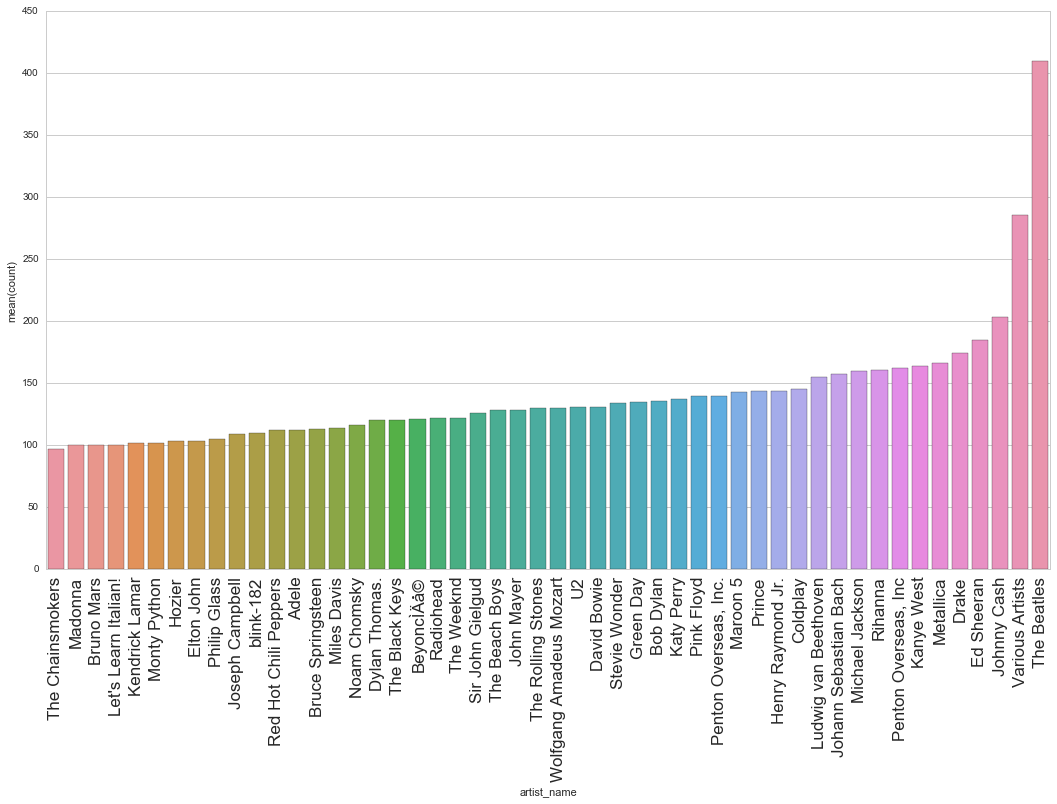

In [44]:
artist_counts = df.groupby('artist_name', as_index=False)['count'].count().sort_values('count', ascending=False)
artist_counts = artist_counts.head(50)
artist_counts = artist_counts.sort_values('count')
plt.figure(figsize = (18,10))
sns.barplot(artist_counts['artist_name'], artist_counts['count'])
plt.xticks(rotation=90, size = 17)
plt.show()

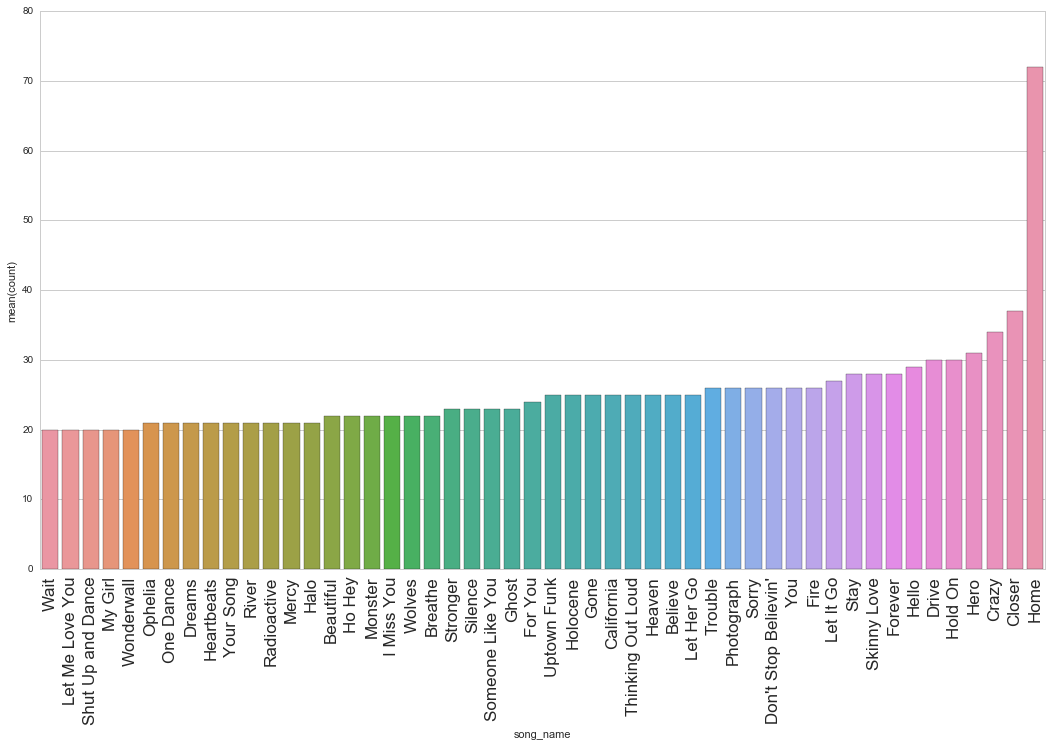

In [45]:
song_counts = df.groupby('song_name', as_index=False)['count'].count().sort_values('count', ascending=False)
song_counts = song_counts.head(50)
song_counts = song_counts.sort_values('count')
plt.figure(figsize = (18,10))
sns.barplot(song_counts['song_name'], song_counts['count'])
plt.xticks(rotation=90, size = 17) 
plt.show()

In [57]:
df.head()

,playlist_id,playlist_name,followers,song_name,number_of_artists,artist_name,artist_id,popularity,track_number,explicit,...,available_markets,delete,artist_popularity,artist_followers,artist_genres,pop_ind,rap_ind,rock_ind,popular_artist_ind,count
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,18123888.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,...,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"dance pop', 'pop', 'post-teen pop",1,0,0,1,1
1,37i9dQZF1DWXDAhqlN7e6W,This Is: Max Martin,15685.0,Hands To Myself,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,69,3,0,...,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"dance pop', 'pop', 'post-teen pop",1,0,0,1,1
2,37i9dQZF1DX7Q7o98uPeg1,Funkst,397098.0,Good For You - KASBO Remix,3,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,35,3,0,...,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"dance pop', 'pop', 'post-teen pop",1,0,0,1,1
3,37i9dQZF1DX3LyU0mhfqgP,Out Now,439685.0,Wolves,2,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,88,1,0,...,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"dance pop', 'pop', 'post-teen pop",1,0,0,1,1
4,37i9dQZF1DX35oM5SPECmN,HIIT Workout,712771.0,Come & Get It,1,Selena Gomez,0C8ZW7ezQVs4URX5aX7Kqx,56,1,0,...,"['AD', 'AR', 'AT', 'AU', 'BE', 'BG', 'BO', 'BR...",NaN,93.0,6817859.0,"dance pop', 'pop', 'post-teen pop",1,0,0,1,1


In [ ]:
for i in range(len(df['artist_genres'])):
    df['artist_genres'][i] = df['artist_genres'][i][1:-1]

In [ ]:
song_counts = df.groupby('song_name', as_index=False)['count'].count().sort_values('count', ascending=False)
song_counts = song_counts.head(50)
song_counts = song_counts.sort_values('count')
plt.figure(figsize = (18,10))
sns.barplot(song_counts['song_name'], song_counts['count'])
plt.xticks(rotation=90, size = 17) 
plt.show()